In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

In [3]:
f(3.0)

20.0

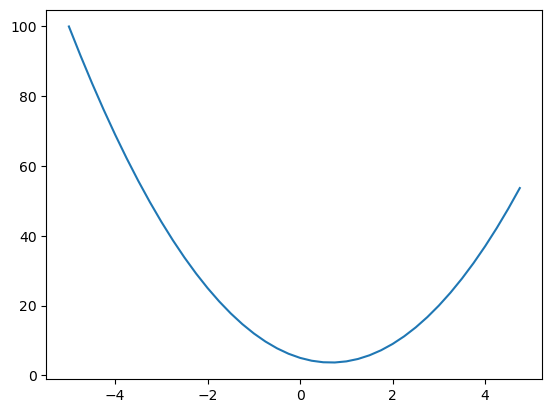

In [4]:
xs= np.arange(-5,5,0.25)
ys= f(xs)
plt.plot(xs,ys)

In [5]:
h= 0.000001
x= 3.0
(f(x+h) - f(x)) / h

14.000003002223593

In [6]:
h= 0.000001
x= -3.0
(f(x+h) - f(x)) / h

-21.999997002808414

In [7]:
h= 0.000001
x= 2/3
(f(x+h) - f(x)) / h

2.999378523327323e-06

In [8]:
a= 2.0
b= -3.0
c= 10.0
d= a*b + c
print(d)

4.0


In [9]:
a= 2.0
d1= a*b + c
a+= h
d2= a*b + c
print(d1)
print(d2)
#d2 larger or lesser??
print((d2-d1)/h)

4.0
3.9999969999999996
-3.000000000419334


In [10]:
a= 2.0
b= -3.0
d1= a*b + c
b+= h
d2= a*b + c
print(d1)
print(d2)
#d2 larger or lesser??
print((d2-d1)/h)

4.0
4.000002
2.000000000279556


In [11]:
a= 2.0
b= -3.0
c= 10.0
d1= a*b + c
c+= h
d2= a*b + c
print(d1)
print(d2)
#d2 larger or lesser??
print((d2-d1)/h)

4.0
4.000000999999999
0.9999999992515995


In [12]:
class Value:
    
    def __init__(self, data):
        self.data= data
    
    def __repr__(self):
        return f"Value(data= {self.data})"
    
    def __add__(self, other):
        out= Value(self.data + other.data)
        return out
    
    def __mul__(self, other):
        out= Value(self.data * other.data)
        return out

a= Value(2.0)
b= Value(-3.0)
c= Value(10.0)
d= a * b + c #a.__mul__(b).__add__(c)
d

Value(data= 4.0)

In [13]:
class Value:
    
    def __init__(self, data, _children=()):
        self.data= data
        self.prev= set(_children)
    
    def __repr__(self):
        return f"Value(data= {self.data})"
    
    def __add__(self, other):
        out= Value(self.data + other.data,(self,other))
        return out
    
    def __mul__(self, other):
        out= Value(self.data * other.data,(self,other))
        return out

a= Value(2.0)
b= Value(-3.0)
c= Value(10.0)
d= a * a + c
for i in d.prev:
    print(i.prev)

{Value(data= 2.0)}
set()


In [14]:
class Value:
    
    def __init__(self, data, _children=(), _op=''):
        self.data= data
        self._prev= set(_children)
        self._op= _op
    
    def __repr__(self):
        return f"Value(data= {self.data})"
    
    def __add__(self, other):
        out= Value(self.data + other.data,(self,other),'+')
        return out
    
    def __mul__(self, other):
        out= Value(self.data * other.data,(self,other),'*')
        return out

a= Value(2.0)
b= Value(-3.0)
c= Value(10.0)
d= a * b + c
print(d._op)
print(d._prev)
for i in d._prev:
    print(i._op)

+
{Value(data= 10.0), Value(data= -6.0)}

*


In [15]:
from graphviz import Digraph

def trace(root):
    nodes, edges= set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot= Digraph(format='svg', graph_attr={'rankdir':'LR'})
    nodes, edges= trace(root)
    for n in nodes:
        uid= str(id(n))
        dot.node(name= uid, label= "{data %.4f}" % (n.data, ), shape='record')
        if n._op:
            dot.node(name= uid + n._op, label= n._op)
            dot.edge(uid+n._op, uid)
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    return dot        

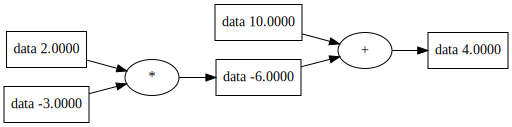

In [16]:
draw_dot(d)

In [17]:
class Value:
    
    def __init__(self, data, _children=(), _op='', label=''):
        self.data= data
        self._prev= set(_children)
        self._op= _op
        self.label= label
    
    def __repr__(self):
        return f"Value(data= {self.data})"
    
    def __add__(self, other):
        out= Value(self.data + other.data,(self,other),'+')
        return out
    
    def __mul__(self, other):
        out= Value(self.data * other.data,(self,other),'*')
        return out

a= Value(2.0, label='a')
b= Value(-3.0, label='b')
c= Value(10.0, label='c')
e= a * b; e.label= 'e'
d= e + c; d.label= 'd'
print(d._op)
print(d._prev)

+
{Value(data= 10.0), Value(data= -6.0)}


In [18]:
def draw_dot(root):
    dot= Digraph(format='svg', graph_attr={'rankdir':'LR'})
    nodes, edges= trace(root)
    for n in nodes:
        uid= str(id(n))
        dot.node(name= uid, label= "{%s | data %.4f}" % (n.label, n.data, ), shape='record')
        if n._op:
            dot.node(name= uid + n._op, label= n._op)
            dot.edge(uid+n._op, uid)
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    return dot        

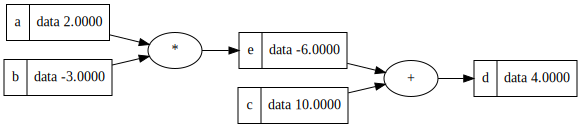

In [19]:
draw_dot(d)

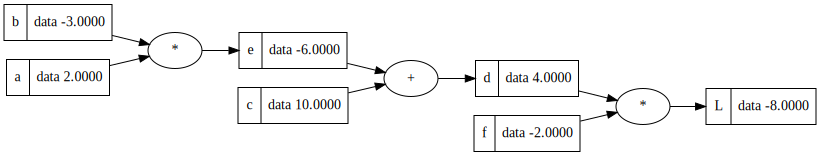

In [20]:
a= Value(2.0, label='a')
b= Value(-3.0, label='b')
c= Value(10.0, label='c')
e= a * b; e.label= 'e'
d= e + c; d.label= 'd'
f= Value(-2.0, label='f')
L= d * f; L.label= 'L'
draw_dot(L)

In [21]:
# The Big Deal
class Value:
    
    def __init__(self, data, _children=(), _op='', label=''):
        self.data= data
        self.grad= 0.0
        self._prev= set(_children)
        self._op= _op
        self.label= label
    
    def __repr__(self):
        return f"Value(data= {self.data})"
    
    def __add__(self, other):
        out= Value(self.data + other.data,(self,other),'+')
        return out
    
    def __mul__(self, other):
        out= Value(self.data * other.data,(self,other),'*')
        return out
    

In [22]:
a= Value(2.0, label='a')
b= Value(-3.0, label='b')
c= Value(10.0, label='c')
e= a * b; e.label= 'e'
d= e + c; d.label= 'd'
f= Value(-2.0, label='f')
L= d * f; L.label= 'L'

In [23]:
def draw_dot(root):
    dot= Digraph(format='svg', graph_attr={'rankdir':'LR'})
    nodes, edges= trace(root)
    for n in nodes:
        uid= str(id(n))
        dot.node(name= uid, label= "{%s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name= uid + n._op, label= n._op)
            dot.edge(uid+n._op, uid)
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    return dot        

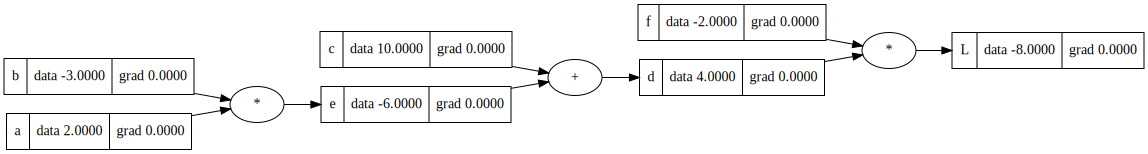

In [24]:
draw_dot(L)

In [25]:
L.grad= 1.0 #dL/dL
d.grad= L.grad * f.data # dL/dd
f.grad= L.grad * d.data #dL/df
e.grad= d.grad * 1.0 
c.grad= d.grad * 1.0
b.grad= e.grad * a.data
a.grad= e.grad * b.data

In [26]:
def grad_checker():
    h= 0.000001
    
    a= 2.0
    b= -3.0
    c= 10.0
    e= a * b
    d= e + c
    f= -2.0
    L1= d * f
    
    a= 2.0
    b= -3.0
    c= 10.0 + h
    e= a * b
    d= e + c
    f= -2.0
    L2= d * f
    print((L2 - L1)/h)
grad_checker() 

-1.999999998503199


In [27]:
e= a * b
d= e + c
L= d * f
print(L)

a.data+= 0.01 * a.grad
b.data+= 0.01 * b.grad
c.data+= 0.01 * c.grad
f.data+= 0.01 * f.grad
e= a * b
d= e + c
L= d * f
print(L)

Value(data= -8.0)
Value(data= -7.286496)


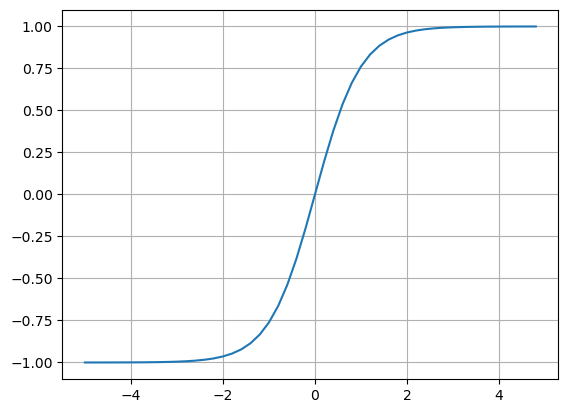

In [28]:
plt.plot(np.arange(-5,5,0.2),np.tanh(np.arange(-5,5,0.2))); plt.grid();

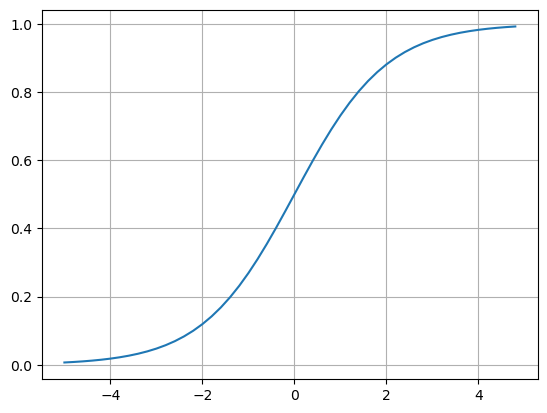

In [29]:
plt.plot(np.arange(-5,5,0.2),1/(1+np.exp(-np.arange(-5,5,0.2)))); plt.grid();

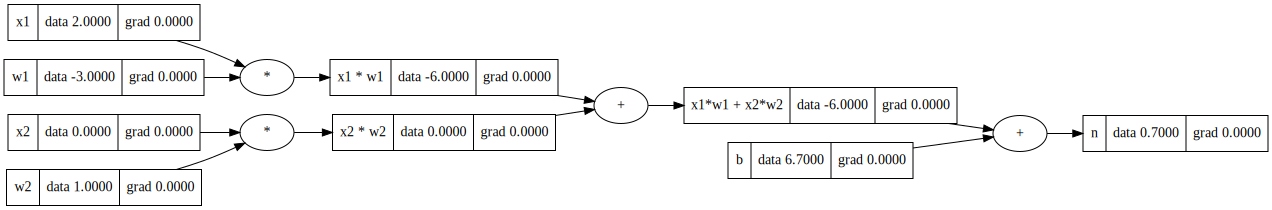

In [37]:
x1= Value(2.0, label='x1')
x2= Value(0.0, label='x2')
w1= Value(-3.0, label='w1')
w2= Value(1.0, label='w2')
b= Value(6.7, label='b')
x1w1= x1 * w1; x1w1.label= 'x1 * w1'
x2w2= x2 * w2; x2w2.label= 'x2 * w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label= 'x1*w1 + x2*w2'
n= x1w1x2w2 + b; n.label= 'n'
draw_dot(n)

In [31]:
# Adding non-linearity direct (no individual pieces)
class Value:
    
    def __init__(self, data, _children=(), _op='', label=''):
        self.data= data
        self.grad= 0.0
        self._prev= set(_children)
        self._op= _op
        self.label= label
    
    def __repr__(self):
        return f"Value(data= {self.data})"
    
    def __add__(self, other):
        out= Value(self.data + other.data,(self,other),'+')
        return out
    
    def __mul__(self, other):
        out= Value(self.data * other.data,(self,other),'*')
        return out
    
    def tanh(self):
        x= self.data
        t= (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out= Value(t, (self,), 'tanh')
        return out

In [40]:
x1= Value(2.0, label='x1')
x2= Value(0.0, label='x2')
w1= Value(-3.0, label='w1')
w2= Value(1.0, label='w2')
b= Value(6.8813735870195432, label='b')
x1w1= x1 * w1; x1w1.label= 'x1 * w1'
x2w2= x2 * w2; x2w2.label= 'x2 * w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label= 'x1*w1 + x2*w2'
n= x1w1x2w2 + b; n.label= 'n'
o= n.tanh(); o.label= 'o';

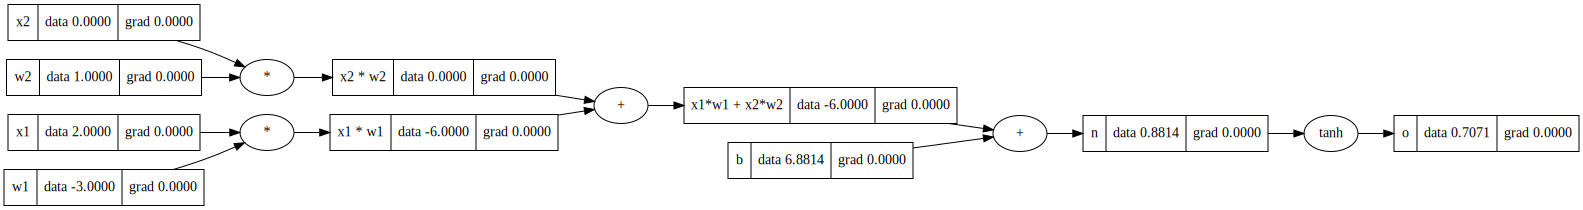

In [33]:
draw_dot(o)

In [34]:
o.grad= 1.0
n.grad= o.grad * (1 - o.data**2)
x1w1x2w2.grad= n.grad * 1.0
b.grad= n.grad * 1.0
x1w1.grad= x1w1x2w2.grad * 1.0
x2w2.grad= x1w1x2w2.grad * 1.0
x2.grad= x2w2.grad * w2.data
w2.grad= x2w2.grad * x2.data
x1.grad= x1w1.grad * w1.data
w1.grad= x1w1.grad * x1.data

In [38]:
# the real Big Deal !!
class Value:
    
    def __init__(self, data, _children=(), _op='', label=''):
        self.data= data
        self.grad= 0.0
        self._prev= set(_children)
        self._op= _op
        self.label= label
        self._backward= lambda: None
    
    def __repr__(self):
        return f"Value(data= {self.data})"
    
    def __add__(self, other):
        out= Value(self.data + other.data,(self,other),'+')
        def _backward():
            self.grad= out.grad * 1.0
            other.grad= out.grad * 1.0
        out._backward= _backward
        return out
    
    def __mul__(self, other):
        out= Value(self.data * other.data,(self,other),'*')
        def _backward():
            self.grad= out.grad * other.data
            other.grad= out.grad * self.data
        out._backward= _backward
        return out
    
    def tanh(self):
        x= self.data
        t= (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out= Value(t, (self,), 'tanh')
        def _backward():
            self.grad= out.grad * (1 - t**2)
        out._backward= _backward
        return out
    

In [41]:
o.grad= 1.0
o._backward()

In [42]:
n._backward()

In [43]:
x1w1x2w2._backward()
b._backward()

In [44]:
x1w1._backward()
x2w2._backward()

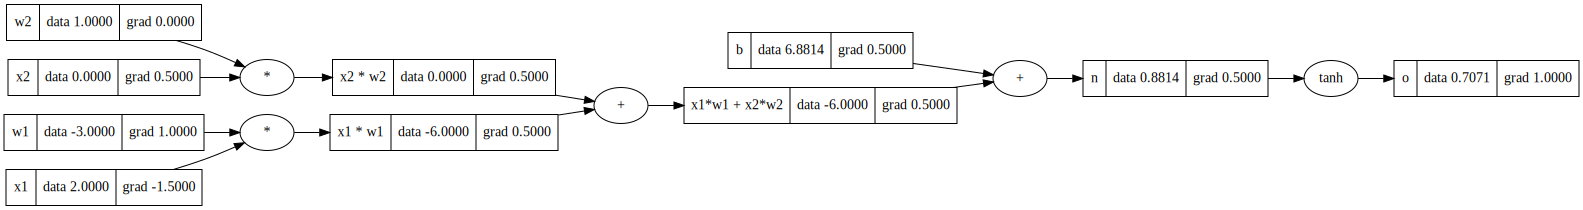

In [45]:
draw_dot(o)

In [46]:
topo= []
visited= set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)

o.grad= 1
for node in reversed(topo):
    node._backward()

In [53]:
# the real Big Deal !!
class Value:
    
    def __init__(self, data, _children=(), _op='', label=''):
        self.data= data
        self.grad= 0.0
        self._prev= set(_children)
        self._op= _op
        self.label= label
        self._backward= lambda: None
    
    def __repr__(self):
        return f"Value(data= {self.data})"
    
    def __add__(self, other):
        out= Value(self.data + other.data,(self,other),'+')
        def _backward():
            self.grad= out.grad * 1.0
            other.grad= out.grad * 1.0
        out._backward= _backward
        return out
    
    def __mul__(self, other):
        out= Value(self.data * other.data,(self,other),'*')
        def _backward():
            self.grad= out.grad * other.data
            other.grad= out.grad * self.data
        out._backward= _backward
        return out
    
    def tanh(self):
        x= self.data
        t= (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out= Value(t, (self,), 'tanh')
        def _backward():
            self.grad= out.grad * (1 - t**2)
        out._backward= _backward
        return out
    
    def backward(self):
        topo= []
        visited= set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.grad= 1
        for node in reversed(topo):
            node._backward()

In [48]:
x1= Value(2.0, label='x1')
x2= Value(0.0, label='x2')
w1= Value(-3.0, label='w1')
w2= Value(1.0, label='w2')
b= Value(6.8813735870195432, label='b')
x1w1= x1 * w1; x1w1.label= 'x1 * w1'
x2w2= x2 * w2; x2w2.label= 'x2 * w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label= 'x1*w1 + x2*w2'
o= x1w1x2w2 + b; n.label= 'o'

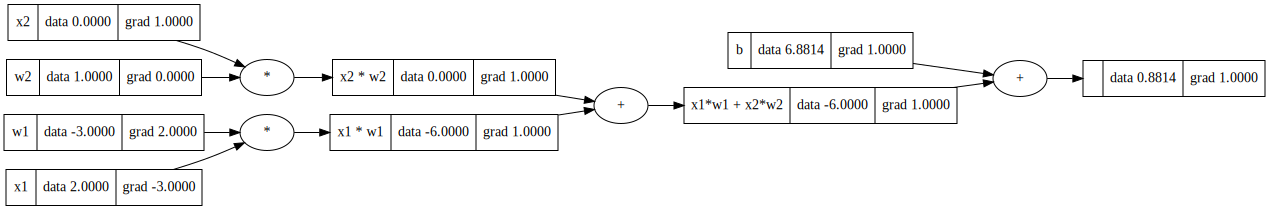

In [49]:
o.backward()
draw_dot(o)

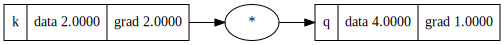

In [50]:
k= Value(2.0, label='k')
q= k * k; q.label= 'q'
q.backward()
draw_dot(q)

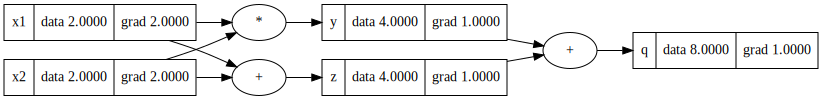

In [54]:
x1= Value(2.0, label='x1')
x2= Value(2.0, label='x2')
y = x1 * x2; y.label= 'y'
z = x1 + x2; z.label= 'z'
q= y + z; q.label= 'q'
q.backward()
draw_dot(q)

# implementing the backward without using the list or topological ordering

In [55]:
# the real Big Deal !!
class Value:
    
    def __init__(self, data, _children=(), _op='', label=''):
        self.data= data
        self.grad= 0.0
        self._prev= set(_children)
        self._op= _op
        self.label= label
        self._backward= lambda: None
    
    def __repr__(self):
        return f"Value(data= {self.data})"
    
    def __add__(self, other):
        out= Value(self.data + other.data,(self,other),'+')
        def _backward():
            self.grad= out.grad * 1.0
            other.grad= out.grad * 1.0
        out._backward= _backward
        return out
    
    def __mul__(self, other):
        out= Value(self.data * other.data,(self,other),'*')
        def _backward():
            self.grad= out.grad * other.data
            other.grad= out.grad * self.data
        out._backward= _backward
        return out
    
    def tanh(self):
        x= self.data
        t= (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out= Value(t, (self,), 'tanh')
        def _backward():
            self.grad= out.grad * (1 - t**2)
        out._backward= _backward
        return out
    
    def backward(self):
        self.grad=1
        for prev in self._prev:
            prev.backward()
            prev=prev._backward()
            

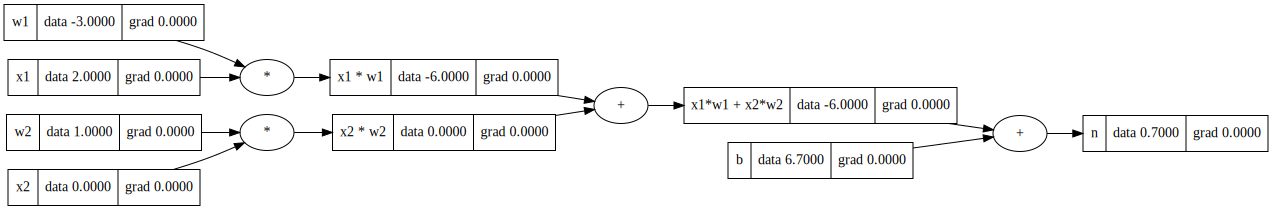

In [56]:
x1= Value(2.0, label='x1')
x2= Value(0.0, label='x2')
w1= Value(-3.0, label='w1')
w2= Value(1.0, label='w2')
b= Value(6.7, label='b')
x1w1= x1 * w1; x1w1.label= 'x1 * w1'
x2w2= x2 * w2; x2w2.label= 'x2 * w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label= 'x1*w1 + x2*w2'
n= x1w1x2w2 + b; n.label= 'n'
draw_dot(n)

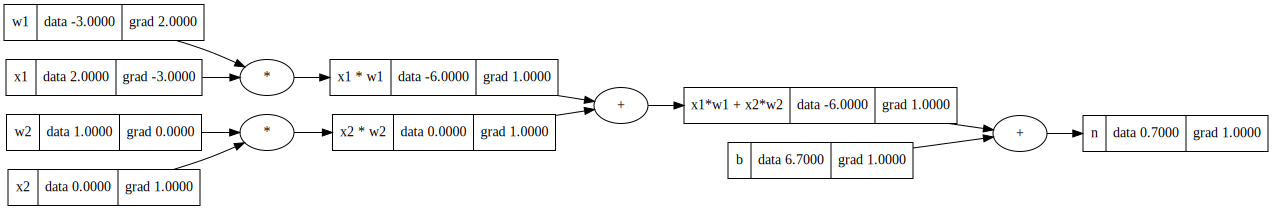

In [57]:
n.backward()
draw_dot(n)

# fixing the bug in grad

In [112]:
# the real Big Deal !!
class Value:
    
    def __init__(self, data, _children=(), _op='', label=''):
        self.data= data
        self.grad= 0.0
        self._prev= set(_children)
        self._op= _op
        self.label= label
        self._backward= lambda: None
    
    def __repr__(self):
        return f"Value(data= {self.data})"
    
    def __add__(self, other):
        out= Value(self.data + other.data,(self,other),'+')
        def _backward():
            self.grad+= out.grad * 1.0
            other.grad+= out.grad * 1.0
        out._backward= _backward
        return out
    
    def __mul__(self, other):
        out= Value(self.data * other.data,(self,other),'*')
        def _backward():
            self.grad+= out.grad * other.data
            other.grad+= out.grad * self.data
        out._backward= _backward
        return out
    
    def tanh(self):
        x= self.data
        t= (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out= Value(t, (self,), 'tanh')
        def _backward():
            self.grad= out.grad * (1 - t**2)
        out._backward= _backward
        return out
    
    def backward(self):
        self.grad=1
        for prev in self._prev:
            
            prev.backward()
            prev=prev._backward()

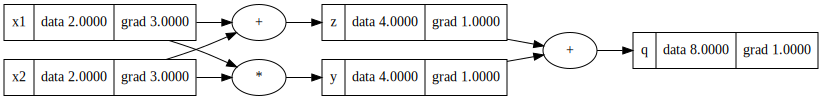

In [114]:
x1= Value(2.0, label='x1')
x2= Value(2.0, label='x2')
y = x1 * x2; y.label= 'y'
z = x1 + x2; z.label= 'z'
q= y + z; q.label= 'q'
q.backward()
draw_dot(q)

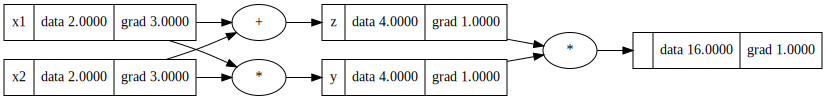

In [115]:
q=y*z
q.backward()
draw_dot(q)